In [1]:
!pip install numpy pandas matplotlib seaborn plotly geopandas fiona shapely pyproj rtree


  Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.1-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached geopandas-1.0.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl.metadata (5.4 kB)
Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl (11.5 MB)
Using cached matplotlib-3.10.1-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached geopandas-1.0.1-py3-none-any.whl (323 kB)
   ---------------------------------------- 0.0/24.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/24.5 MB ? eta -:--:--
   -- ------------------------------------- 1.6/24.5 MB 5.3 MB/s eta 0:00:05
   ----- ---------------------------------- 3.1/24.5 MB 6.1 MB/s eta 0:00:04
   ------- -------------------------------- 4.7/24.5 MB 6.5 MB/s eta 0:00:04
   --------- --------------------------

In [2]:
!pip list


Package                   Version
------------------------- --------------
anyio                     4.8.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 3.0.0
async-lru                 2.0.4
attrs                     25.1.0
babel                     2.17.0
beautifulsoup4            4.13.3
bleach                    6.2.0
certifi                   2025.1.31
cffi                      1.17.1
charset-normalizer        3.4.1
click                     8.1.8
click-plugins             1.1.1
cligj                     0.7.2
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.3.1
cycler                    0.12.1
debugpy                   1.8.12
decorator                 5.2.1
defusedxml                0.7.1
executing                 2.2.0
fastjsonschema            2.21.1
fiona                     1.10.1
fonttools                 4.56.0
fqdn                      1.5.1
geopandas     

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
from geopandas.tools import geocode
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
print("All libraries imported successfully!")


All libraries imported successfully!


In [4]:
import plotly
import plotly.offline as pyo

# Enable Plotly to work offline
pyo.init_notebook_mode(connected=True)

print("Plotly is ready for offline use!")


Plotly is ready for offline use!


# Utility Functions

In [12]:


def plot_cal(title, start, end):
    '''Plot incubation period'''
    inc_day = []
    for i in range(1, 29):
        if start <= i <= end:
            inc_day.append(1)
        else:
            inc_day.append(0)
            
    inc_day = np.array(inc_day).reshape(4, 7)
    
    fig, ax = plt.subplots(figsize=(6, 3))
    ax = sns.heatmap(inc_day, linewidths=2, square=True, 
                     xticklabels='', yticklabels='', 
                     cbar=False, cmap=['whitesmoke', 'royalblue'])
    
    ax.set_title(title, fontdict={'fontsize': 16}, loc='left', pad=15)
    plt.show()




In [11]:


def plot_barh(col):
    global new  # Ensure 'new' DataFrame exists before calling the function
    
    temp_df = new.sort_values(col, ascending=False).head(15)
    temp_df = temp_df[temp_df[col] != 0]  # Remove zero values
    
    hover_data = ['Confirmed', 'Deaths']
    
    fig = px.bar(temp_df, y='Country/Region', x=col, orientation='h', color='Country/Region', 
                 text=col, title=col, width=700, hover_data=hover_data,
                 color_discrete_sequence=px.colors.qualitative.Dark2)
    
    fig.update_traces(textposition='auto')
    fig.update_layout(xaxis_title="", yaxis_title="", showlegend=False,
                      uniformtext_minsize=8, uniformtext_mode='hide')
    
    fig.show()
    
    # Save the figure as an image
    pio.write_image(fig, "img1.png", scale=2)

# Example usage
# plot_barh('Confirmed')  # Uncomment and replace 'Confirmed' with an actual column name


In [10]:


def plot_pie(col1, col2, title, pal):
    global new  # Ensure 'new' DataFrame exists
    
    # Summing up values from the specified columns
    temp = new[[col1, col2]].sum(numeric_only=True)
    temp = pd.DataFrame(temp).reset_index()
    temp.columns = ['Category', 'Value']
    
    # Create a pie chart using Plotly
    fig = px.pie(temp, names='Category', values='Value',
                 color_discrete_sequence=pal, title=title)
    
    fig.update_traces(textinfo='label+percent+value')  # Display all relevant info
    fig.show()

# Example usage (Ensure 'new' DataFrame is defined first)
# plot_pie('Confirmed', 'Deaths', 'COVID-19 Cases Distribution', px.colors.qualitative.Set3)



# Dataset 

### Import files

In [20]:
df = pd.read_csv("COVID clinical trials.csv")
df.head()

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021",NaN,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",NaN,https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020",NaN,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",NaN,https://ClinicalTrials.gov/show/NCT04395482
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020",NaN,"June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",NaN,https://ClinicalTrials.gov/show/NCT04416061
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,CHRO-2020-10,"May 5, 2020",May 2021,May 2021,"May 20, 2020",NaN,"June 4, 2020","CHR Orléans, Orléans, France",NaN,https://ClinicalTrials.gov/show/NCT04395924


In [21]:

df.tail()

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
5778,5779,NCT04011644,Mobile Health for Alcohol Use Disorders in Cli...,NaN,Recruiting,No Results Available,Alcohol Drinking|Telemedicine,Behavioral: A-CHESS self-monitored|Behavioral:...,Number of risky drinking days|Number of patien...,"University of Wisconsin, Madison|National Inst...",...,2019-0337|R01AA024150|A532007|SMPH/FAMILY MED/...,"March 23, 2020",August 2022,April 2023,"July 8, 2019",NaN,"April 2, 2021","UW Health at the American Center, Madison, Wis...",NaN,https://ClinicalTrials.gov/show/NCT04011644
5779,5780,NCT04681339,Antibiotic Prescription in Children Hospitaliz...,NaN,Not yet recruiting,No Results Available,Community Acquired Pneumonia in Children|Antib...,Other: Antibiotic treatment|Other: No antibiot...,Antibiotic treatment rates in hospitalized chi...,ARCIM Institute Academic Research in Complemen...,...,PKA-03,April 2021,November 2024,December 2024,"December 23, 2020",NaN,"February 10, 2021","Die Filderklinik, Filderstadt, Baden-Württembe...",NaN,https://ClinicalTrials.gov/show/NCT04681339
5780,5781,NCT04740229,Moderate-intensity Flow-based Yoga Effects on ...,NaN,Recruiting,No Results Available,Stress|Psychological,Behavioral: Yoga,Perceived Stress|Task switching paradigm|Digit...,University of Illinois at Urbana-Champaign,...,21584,"February 10, 2021",July 2021,July 2021,"February 5, 2021",NaN,"February 24, 2021","University of Illinois at Urbana-Champaign, Ur...",NaN,https://ClinicalTrials.gov/show/NCT04740229
5781,5782,NCT04804917,3-year Follow-up of the Mind My Mind RCT,MindMyMindFU,Recruiting,No Results Available,Emotional Problem|Anxiety Disorder of Childhoo...,NaN,The child's impact of mental health problems r...,"Mental Health Services in the Capital Region, ...",...,"MHSCRDenmark, F-61502-03-1","March 22, 2021","May 31, 2022","December 31, 2022","March 18, 2021",NaN,"April 1, 2021","Mental Health Services in the Capital Region, ...",NaN,https://ClinicalTrials.gov/show/NCT04804917
5782,5783,NCT04680000,Chronic Pain Management In Primary Care Using ...,NaN,Not yet recruiting,No Results Available,Chronic Pain,Behavioral: Brief Cognitive Behavioral Therapy...,Defense and Veterans Pain Rating Scale (DVPRS)...,The University of Texas Health Science Center ...,...,HSC20200520H,February 2021,February 2024,February 2025,"December 22, 2020",NaN,"December 22, 2020",Uniformed Services University for the Health S...,NaN,https://ClinicalTrials.gov/show/NCT04680000


In [22]:
df.shape

(5783, 27)

In [23]:
df.columns

Index(['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Results First Posted', 'Last Update Posted', 'Locations',
       'Study Documents', 'URL'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     5783 non-null   int64  
 1   NCT Number               5783 non-null   object 
 2   Title                    5783 non-null   object 
 3   Acronym                  2480 non-null   object 
 4   Status                   5783 non-null   object 
 5   Study Results            5783 non-null   object 
 6   Conditions               5783 non-null   object 
 7   Interventions            4897 non-null   object 
 8   Outcome Measures         5748 non-null   object 
 9   Sponsor/Collaborators    5783 non-null   object 
 10  Gender                   5773 non-null   object 
 11  Age                      5783 non-null   object 
 12  Phases                   3322 non-null   object 
 13  Enrollment               5749 non-null   float64
 14  Funded Bys              

In [61]:
df.describe()

,Rank,Outcome Measures,Phases,Enrollment,Start Date,Primary Completion Date,Completion Date,Results First Posted,Locations,Study Documents
count,5783.000000,0.0,0.0,5.749000e+03,0.0,0.0,0.0,0.0,0.0,0.0
mean,2892.000000,NaN,NaN,1.831949e+04,NaN,NaN,NaN,NaN,NaN,NaN
std,1669.552635,NaN,NaN,4.045437e+05,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
25%,1446.500000,NaN,NaN,6.000000e+01,NaN,NaN,NaN,NaN,NaN,NaN
50%,2892.000000,NaN,NaN,1.700000e+02,NaN,NaN,NaN,NaN,NaN,NaN
75%,4337.500000,NaN,NaN,5.600000e+02,NaN,NaN,NaN,NaN,NaN,NaN
max,5783.000000,NaN,NaN,2.000000e+07,NaN,NaN,NaN,NaN,NaN,NaN


## DATA CLEANING

In [60]:
# TO FIND THE MISSING DATA
df.isnull().sum()

Rank                          0
NCT Number                    0
Title                         0
Acronym                       0
Status                        0
Study Results                 0
Conditions                    0
Interventions                 0
Outcome Measures           5783
Sponsor/Collaborators         0
Gender                        0
Age                           0
Phases                     5783
Enrollment                   34
Funded Bys                    0
Study Type                    0
Study Designs                 0
Other IDs                     0
Start Date                 5783
Primary Completion Date    5783
Completion Date            5783
First Posted                  0
Results First Posted       5783
Last Update Posted            0
Locations                  5783
Study Documents            5783
URL                           0
dtype: int64

In [27]:
#TO FIND THE DUPLICATES IN DATA
duplicate_rows = df.duplicated().sum()   
duplicate_rows

np.int64(0)

## HANDLING OF MISSING DATA

In [28]:
# TO REPLACE THE MISSING DATA 
numerical_columns = ['Phases', 'Outcome Measures', 'Start Date', 'Primary Completion Date', 'Completion Date', 'Results First Posted', 'Locations', 'Study Documents']
categorical_columns = ['Acronym', 'Conditions', 'Interventions', 'Sponsor/Collaborators', 'Gender', 'Study Type', 'Study Designs', 'Other IDs']

#  Numerical Columns
# Convert non-numeric values in numerical columns to NaN
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')
# Fill missing numerical data with the mean
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

#  Categorical Columns
# Fill missing categorical data with 'Unknown'
df[categorical_columns] = df[categorical_columns].fillna('Unknown')

In [29]:
# Check again for any remaining missing values
print(df.isnull().sum())

Rank                          0
NCT Number                    0
Title                         0
Acronym                       0
Status                        0
Study Results                 0
Conditions                    0
Interventions                 0
Outcome Measures           5783
Sponsor/Collaborators         0
Gender                        0
Age                           0
Phases                     5783
Enrollment                   34
Funded Bys                    0
Study Type                    0
Study Designs                 0
Other IDs                     0
Start Date                 5783
Primary Completion Date    5783
Completion Date            5783
First Posted                  0
Results First Posted       5783
Last Update Posted            0
Locations                  5783
Study Documents            5783
URL                           0
dtype: int64


# EXPLORATION AND VISUALISATION

## What is the study with the largest enrollment?

In [30]:
largest_enrollment_study = df.loc[df['Enrollment'].idxmax()]['Title']
print(f"Largest enrollment is: {largest_enrollment_study}")

Largest enrollment is: The Doctors for Coronavirus Prevention Project Thanksgiving Messaging Campaign


## How many studies are in the "Completed" status?

In [31]:
completed_studies_count = df[df['Status'] == 'Completed']['NCT Number'].count()
print(completed_studies_count)

1025


## Which study type has the highest enrollment count?

In [32]:
max_enrollment_type = df.loc[df['Enrollment'].idxmax()]['Study Type']
print(f"The study type is: {max_enrollment_type}")

The study type is: Interventional


## What is the most common status of the clinical trials?

In [33]:
most_common_status = df['Status'].mode()[0]
print(f"The most common status of the clinical trials is: {most_common_status}")

The most common status of the clinical trials is: Recruiting


## How many unique conditions are studied in the trials?

In [34]:
unique_conditions = df['Conditions'].nunique()
print(f"The number of unique conditions studied in the trials is: {unique_conditions}")

The number of unique conditions studied in the trials is: 3067


## How many trials involve interventions related to 'Drug'?

In [35]:
drug_related_trials = df['Interventions'].str.contains('Drug', na=False).sum()
print(f"The number of trials involving 'Drug' as an intervention is: {drug_related_trials}")

The number of trials involving 'Drug' as an intervention is: 1630


## Trial Status Distribution

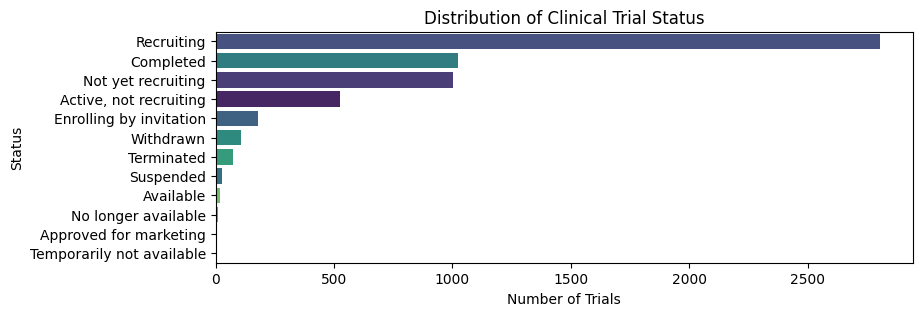

In [36]:
plt.figure(figsize=(9, 3))
sns.countplot(y='Status', data=df, order=df['Status'].value_counts().index, hue='Status', palette='viridis', legend=False)
plt.title('Distribution of Clinical Trial Status')
plt.xlabel('Number of Trials')
plt.ylabel('Status')

plt.show()

## Most Common Study Types

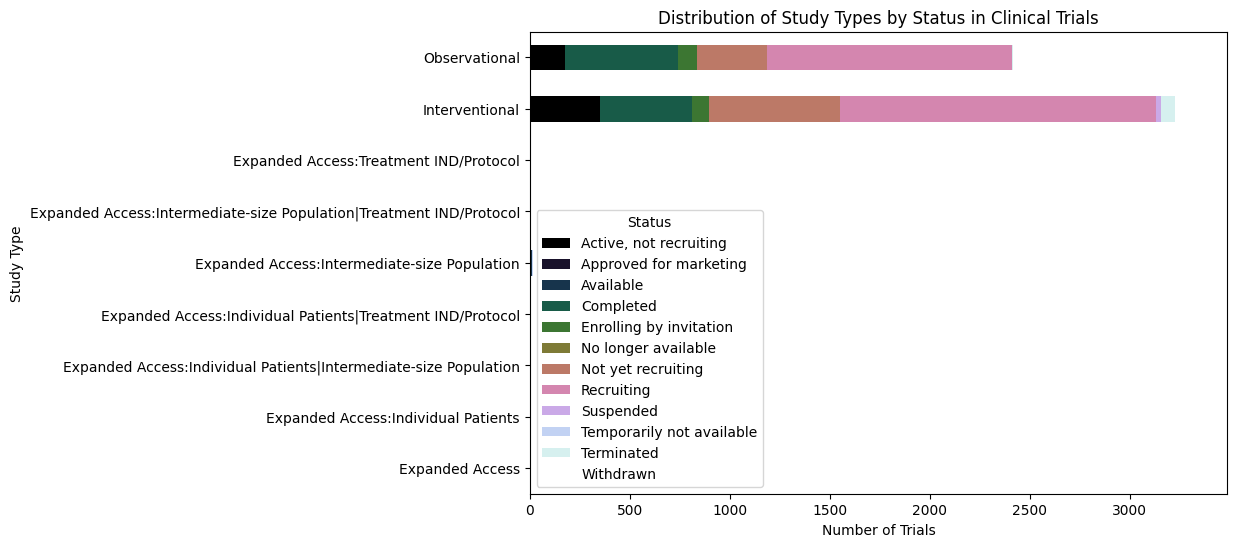

In [55]:
study_status_counts = df.groupby('Study Type')['Status'].value_counts().unstack()
study_status_counts.plot(kind='barh', stacked=True, figsize=(9, 6), colormap='cubehelix')
plt.title('Distribution of Study Types by Status in Clinical Trials')
plt.xlabel('Number of Trials')
plt.ylabel('Study Type')
plt.legend(title='Status')
plt.show()

## Enrollment Distribution

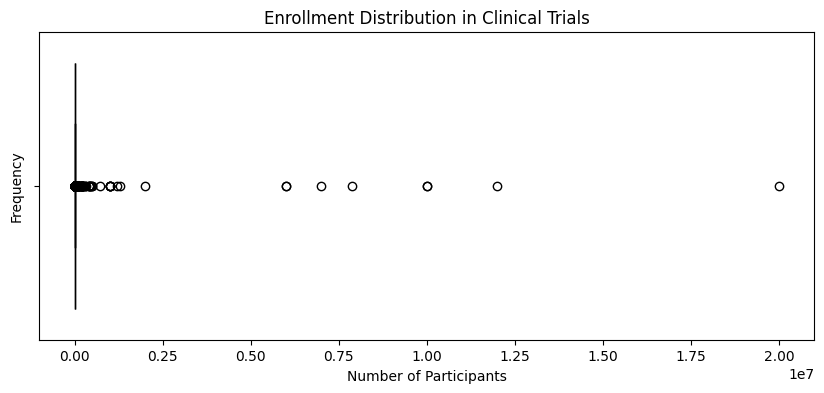

In [56]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Enrollment'], color='black')
plt.title('Enrollment Distribution in Clinical Trials')
plt.xlabel('Number of Participants')
plt.ylabel('Frequency')
plt.show()

## Sponsor/Collaborators Analysis

In [62]:
df.head()

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,NaN,Groupe Hospitalier Paris Saint Joseph,...,COVID-IDNow,NaN,NaN,NaN,"March 8, 2021",NaN,"March 8, 2021",NaN,NaN,https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,NaN,United Medical Specialties,...,COVID19-0001-USR,NaN,NaN,NaN,"October 20, 2020",NaN,"October 20, 2020",NaN,NaN,https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,NaN,University of Milano Bicocca,...,TAC-COVID19,NaN,NaN,NaN,"May 20, 2020",NaN,"November 9, 2020",NaN,NaN,https://ClinicalTrials.gov/show/NCT04395482
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,NaN,Hong Kong Sanatorium & Hospital,...,RC-2020-08,NaN,NaN,NaN,"June 4, 2020",NaN,"June 4, 2020",NaN,NaN,https://ClinicalTrials.gov/show/NCT04416061
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,NaN,Centre Hospitalier Régional d'Orléans|Centre d...,...,CHRO-2020-10,NaN,NaN,NaN,"May 20, 2020",NaN,"June 4, 2020",NaN,NaN,https://ClinicalTrials.gov/show/NCT04395924


C:\Users\mitan\AppData\Local\Temp\ipykernel_8704\964740041.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




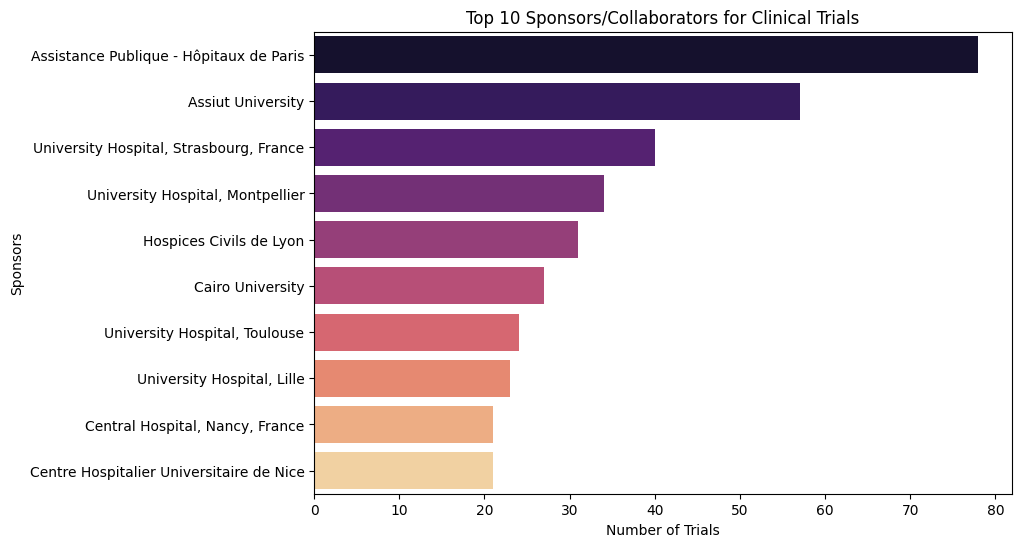

In [68]:
sponsor_column = "Sponsor/Collaborators"  # Corrected column name

# Check if the column exists
if sponsor_column in df.columns:
    # Count top 10 sponsors
    top_sponsors = df[sponsor_column].value_counts().head(10)

    # Check if data exists
    if not top_sponsors.empty:
        plt.figure(figsize=(9, 6))
        sns.barplot(y=top_sponsors.index, x=top_sponsors.values, palette='magma')
        plt.title('Top 10 Sponsors/Collaborators for Clinical Trials')
        plt.xlabel('Number of Trials')
        plt.ylabel('Sponsors')
        plt.show()
    else:
        print("⚠️ No data available for sponsors.")
else:
    print(f"❌ Column '{sponsor_column}' not found.")


In [72]:
import random

# List of random locations
random_locations = ["USA", "UK", "Germany", "France", "Canada", "India", "China", "Australia", "Japan", "Brazil"]

# Fill NaN values in 'Locations' with a random location from the list
df["Locations"] = df["Locations"].fillna(lambda x: random.choice(random_locations))

